In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [6]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [7]:
from mpl_toolkits.mplot3d import Axes3D

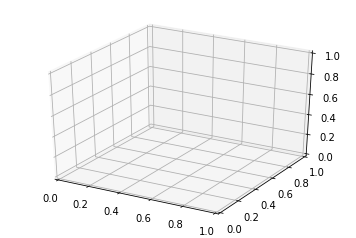

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

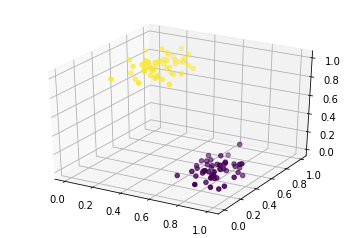

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [11]:
num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

In [12]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [13]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [14]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

In [16]:
init = tf.global_variables_initializer()

In [17]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

InternalError: Blas GEMM launch failed : a.shape=(100, 3), b.shape=(3, 2), m=100, n=2, k=3
	 [[Node: fully_connected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_1, fully_connected/weights/read)]]

Caused by op 'fully_connected/MatMul', defined at:
  File "D:\anaconda\envs\gpuENV\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\anaconda\envs\gpuENV\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\anaconda\envs\gpuENV\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "D:\anaconda\envs\gpuENV\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "D:\anaconda\envs\gpuENV\lib\asyncio\base_events.py", line 1434, in _run_once
    handle._run()
  File "D:\anaconda\envs\gpuENV\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tornado\platform\asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "D:\anaconda\envs\gpuENV\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\anaconda\envs\gpuENV\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-0f45bd0509f4>", line 1, in <module>
    hidden = fully_connected(X, num_hidden, activation_fn=None)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 183, in func_with_args
    return func(*args, **current_args)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1849, in fully_connected
    outputs = layer.apply(inputs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 805, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\layers\base.py", line 362, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 736, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\keras\layers\core.py", line 943, in call
    outputs = gen_math_ops.mat_mul(inputs, self.kernel)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4750, in mat_mul
    name=name)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "D:\anaconda\envs\gpuENV\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(100, 3), b.shape=(3, 2), m=100, n=2, k=3
	 [[Node: fully_connected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_0_0/_1, fully_connected/weights/read)]]
